# Исследование по выявлению по выявлению потенциально прибыльных игровых платформ #

## Описание проекта ##


Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Датафрейм имеет следующую структуру ###

-Name — название игры,\
-Platform — платформа,\
-Year_of_Release — год выпуска,\
-Genre — жанр игры,\
-NA_sales — продажи в Северной Америке (миллионы проданных копий),\
-EU_sales — продажи в Европе (миллионы проданных копий),\
-JP_sales — продажи в Японии (миллионы проданных копий),\
-Other_sales — продажи в других странах (миллионы проданных копий),\
-Critic_Score — оценка критиков (максимум 100),\
-User_Score — оценка пользователей (максимум 10),\
-Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг\ компьютерных игр и присваивает им подходящую возрастную категорию.

### План работы ###

1.Открыть таблицу и изучить данные.\
2.Выявить аномалии и пропуски.\
3.Провести предобработку данных
    
    * поменять названия колонок 3.1 
    * удалить дубликаты 3.2
    * удалить или заменить пропуски 3.3
    * поменять типы данных 3.4

4.Провести анализ данных и подготовить актуальные данные.\
5.Составить портрет пользователя для каждого региона.\
6.Проверить гипотезы.\
7.Сделать выводы по каждому разделу и общий вывод.

###  Откроем таблицу с данными и изучим общую информацию ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
    


In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


*с помощью метода info изучим общую информацию о таблице, посмотрим на тип данных.*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Присутствуют разные типы данных. В некоторых столбцах тип данных требует изменений.

Изменение названий колонок

*Приведем названия колонок к нижнеу регистру с помощью метода str.lower()*

In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


*Посмотрим уникальные значения всех столбцов, для этого можно использовать функцию с вложенным циклом*

In [5]:
def check_columns(data):
    for column in data.columns:
        print(f'Уникальные значения столбца', column)
        print(data[column].unique())

In [6]:
check_columns(data)

Уникальные значения столбца name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца year_of_release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Уникальные значения столбца genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значения столбца na_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 

Посмотрим на пропущенные значения в столбцах 'name', 'year_of_release', 'user_score', 'critic_score', 'platform', 'rating', 'genre'

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
data[data['platform'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [10]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*Найдем дубликаты по названию, платформе и году*

In [14]:
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


### Вывод по первому разделу ###
**1.4.1. В некоторых столбцах есть неправильныый тип данных(год выпуска, оценка пользователей, оценка критиков и рейтинг)\
1.4.2. В столбцах есть пропуски ('name', 'genre', 'critic_score', 'user_score', 'rating')\
1.4.3. Есть дубликаты по имени, году выпуска и платформе.\
1.4.4. В столбце user_score есть значения tbd,
    что переводится как - будет определено, тоесть по другому означет, что нет оценок.\
1.4.5. Причины пропусков могут быть разными - как от человеческого фактора, так и от технического характера,  
    - или например отсутствие рейтинга может говорить о том, что вышла новая игра и ее еще не успели оценить,  
    - либо игра не крупномасштабная и по ней ESRB просто не поставило оценку.\
1.4.6. Данные требуют дальнейшей предобработки.**


<div class="alert alert-success">

**Артём:** 👍 Молодец.
  
</div> 

## ПОДГОТОВКА ДАННЫХ ##

### Обработка пропусков ###

*Сначала найдем пропуски в столбце год выпуска и оценим их количество. Поcле их обработки изменим тип данных в данном столбце на int*

In [15]:
data['year_of_release'].isna().sum()

269

*269 пропусков. Количество пропусков небольшое, процент от общего процента датафрейма составляет чуть меньше двух процентов. Удалим данные пропуски  с помощью метода dropna()*

In [16]:
data.drop(data[data['year_of_release'].isna()].index, inplace=True)

In [17]:
data['year_of_release'].astype(int)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int64

*Найдем и обработаем количество значений 'tbd' в колонке с оценкой пользователей*

In [18]:
tbd_count = data.loc[data['user_score'] == 'tbd', 'user_score'].count()


*Посчитаем долю таких значений от всего датафрейма*

In [19]:
(tbd_count / len(data)) * 100

14.447282013863552

Это больше 10 процентов датафрейма. Удалять нельзя. Но можно заменить на значения NaN

*Приведем столбец user_score к числовому типу данных с помощью метода to_numeric и параметра errors='coerse', заменив некорректные значения на NaN*

In [20]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

*Заменим пропущенные значения в столбце с оценкой пользователя заглушкой со значением -1, потомучто на значение '0' нельзя заменить из за присутствия этого значения в столбце*

In [21]:
data['user_score'] = data['user_score'].fillna(-1)

*Найдем пропуски в столбце с оценкой критиков и заменим их такой же заглушкой как в столбце с оценкой пользоателей и  приведем тип данных к int методом astype*

In [22]:
data['critic_score'].isna().sum()

8463

In [23]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [24]:
data['critic_score'] = data['critic_score'].astype(int)

*Найдем пропуски в стобце с рейтингом и заменим их на значения 'nr' и выведем таблицу на экран*

In [25]:
data['rating'].isna().sum()

6678

In [26]:
data['rating'] = data['rating'].fillna('nr')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1.0,nr
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,nr


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


*тип данных в столбце года выпуска не изменился. изменим его после удаления  строк-дубликатов*

Данные строки 659 и 14244 дублируют друг друга. Эта одна и та же игра. Просто в первой строке данные по Америке и Европе а по второй строке данные по Японии. Удалим все неявные дубликаты методом drop_duplicates.

In [28]:
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1,-1.0,nr
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1,-1.0,nr
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83,5.5,E


In [29]:
data.drop_duplicates()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1.0,nr
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,nr
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1,-1.0,nr
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1,-1.0,nr
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,nr
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1,-1.0,nr


In [30]:
!!!!!!!!!!!!!!

data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,32.975739,2.687632
std,5.877050,0.818416,0.506696,0.311082,0.187994,36.302673,4.170069
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [31]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1.0,nr
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,nr
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,nr
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,nr


*Теперь пробуем поменять снова тип данных в столбце года выпуска на int*

In [32]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


*после удаления ненужных строк, видим, что тип данных столбца года выпуска изменился на int*

*Проверим данные на явные дубликаты методом duplicated()*

In [34]:
data.duplicated().sum()

0

**Контрольная проверка на пропуски**

In [35]:
data.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

*Посчитаем суммарные продажи и добавим столбец по суммарным продажам*

In [36]:
def sum_sales(row):
    try:
        sum_sales = row['na_sales'] + \
        row['eu_sales'] + \
        row['jp_sales'] + \
        row['other_sales']
        return sum_sales
    except:
        return 'ошибка'
                
data['sum_sales'] = data.apply(sum_sales, axis=1)
data.head(10)
            
        
        

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,nr,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,nr,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,nr,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,nr,28.31


**Вывод по шагу 2 - предобработка данных\
1 Изменены типы данных в нужных столбцах\
2 Удалены явные дубликаты и неявные строки-дубликаты по имени, платформе и году выпуска\
3 Найдены и удалены пропуски там, где это возможно. В остальных случаях пропуски заменены заглушкой\
4 Изменены типы данных в столбцах 'user_score' и 'critic_score' на int\
5 Добавлен столбец по суммарным продажам**

## Исследовательский анализ данных ##

Ответим на следующие вопросы:
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте  распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Не учитывайте в работе данные за предыдущие годы.
5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
8. Соотнесите выводы с продажами игр на других платформах.
9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Ответ на первый вопрос - посмотрм сколько игр выпускалось в разные годы. ###

*Применим метод pivot_table и построим график распределения игр по годам*

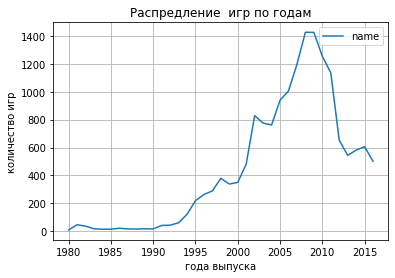

In [37]:
data.pivot_table(index=('year_of_release'), values='name', aggfunc=('count')).plot(xlabel='года выпуска', ylabel='количество игр', title = 'Распредление  игр по годам', grid=True)
plt.show()

*Из графика видно, что начиная с 95 года с количеством в 200 выпущенных игр, каждые 5 лет выпускалось по 400 новых игр вплот до 2010 года. Длее идет резкое падение числа выпускаемх игр с 2010 по 2015 года с 1400 игр до 600, что можно обьяснить улучшением качества игровых движков вместо количества выпускаемых игр*

*Считаю, что данные за все периоды не важны и что актуальный период нужно брать примерно за 3 предыдущих года, так как игры создаются 1-2 года и далее идет выход игры на рынок - пиковый год продаж. Будем смотреть 2014-2016 года*

*Найдем суммарные продажи по платформам и определим топ-5 платформ по суммарным продажам, затем построим распределение по годам*

### Ответ на вопрос 2
Посмотрим как менялись продажи по платформам ###

In [38]:
data.pivot_table(index=['platform'], values='sum_sales', aggfunc=('sum')).sort_values(by='sum_sales', ascending=False)


,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


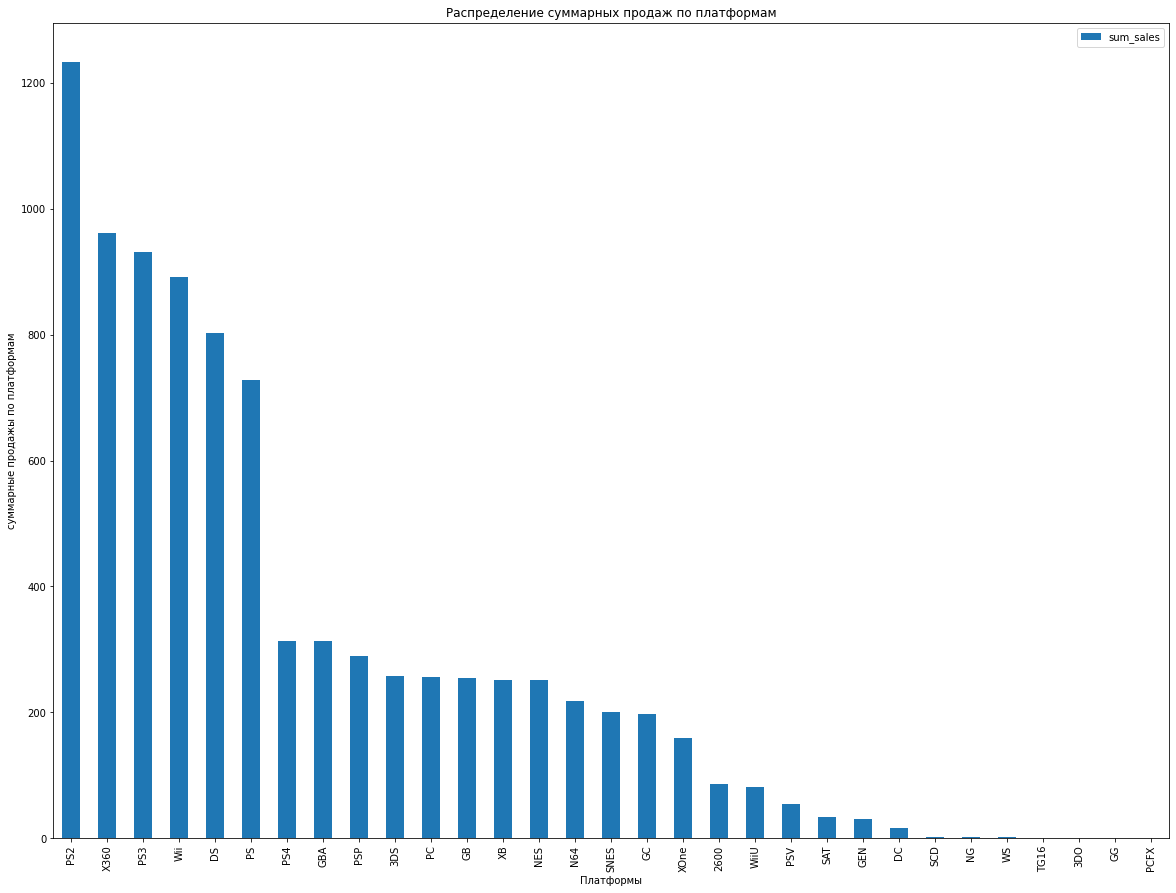

In [39]:
data.pivot_table(index=['platform'], values='sum_sales', aggfunc=('sum')).sort_values(by='sum_sales', ascending=False).plot(kind='bar', figsize=(20, 15), title = 'Распределение суммарных продаж по платформам',\
xlabel = 'Платформы', ylabel='суммарные продажы по платформам')
plt.show();

*На графике видно, что наибольшие суммарные продажи имеет шестерка лидеров - это платформы PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Меньше всего продаж на платформах на NG и WS. Заметим, что при распределении продаж по платформам самая перспективная платформа PS4 уже не явлется лидером а идет аж на 7м месте, однако это не означает, что она не перспективна и не будет являтся прибыльной*

### Ответ на третий вопрос ###

*Найдем 10 топ платформ по глобальнм продажам и посмотрим их динамику*

In [40]:
new_list_platforms = list(data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index[:10])
new_list_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

*Посмотрим как менялись продажи по платформам и построим рапределение продаж по годам*

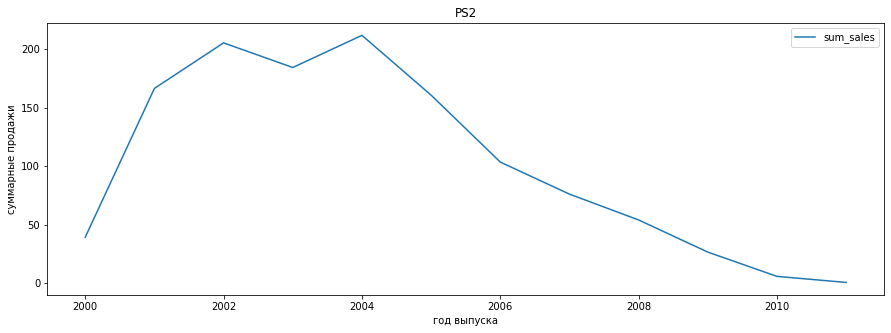

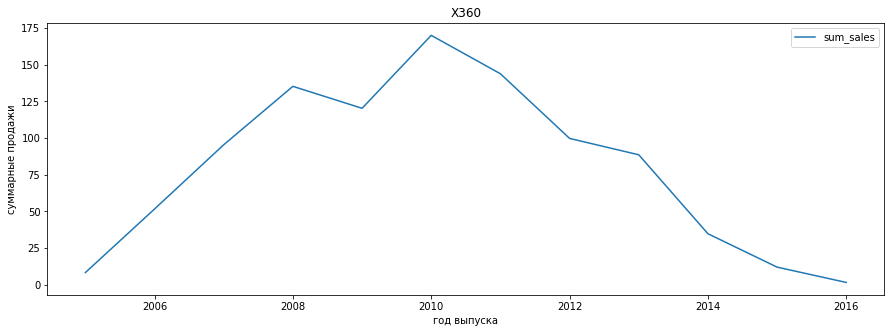

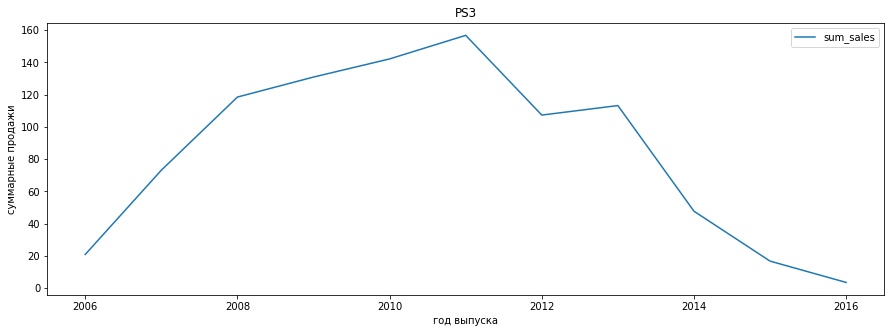

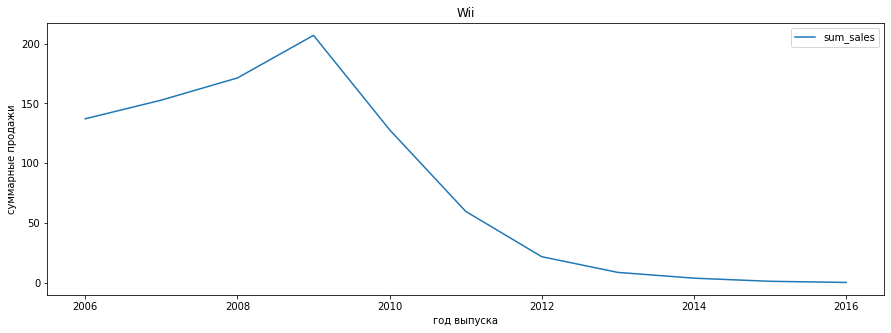

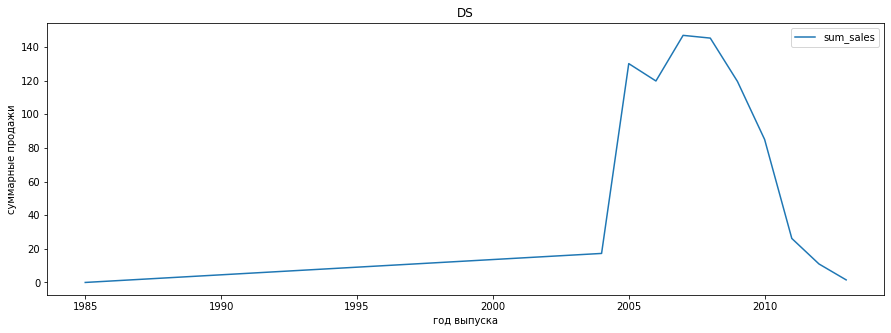

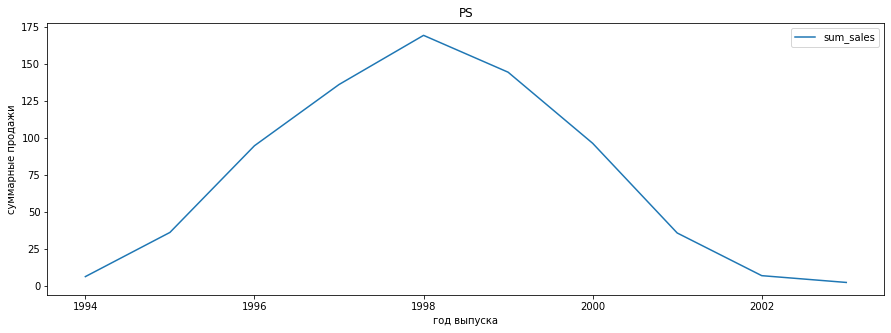

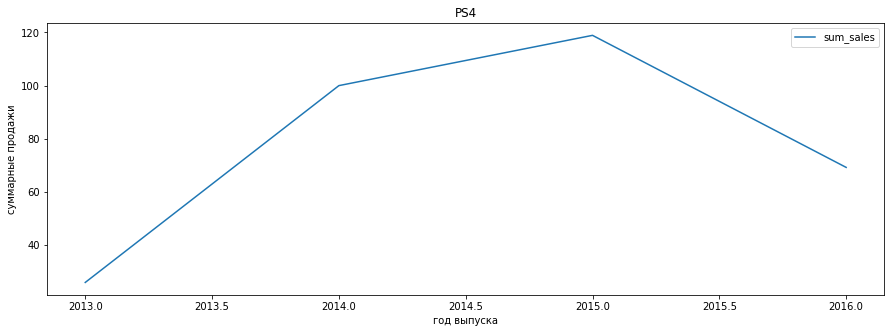

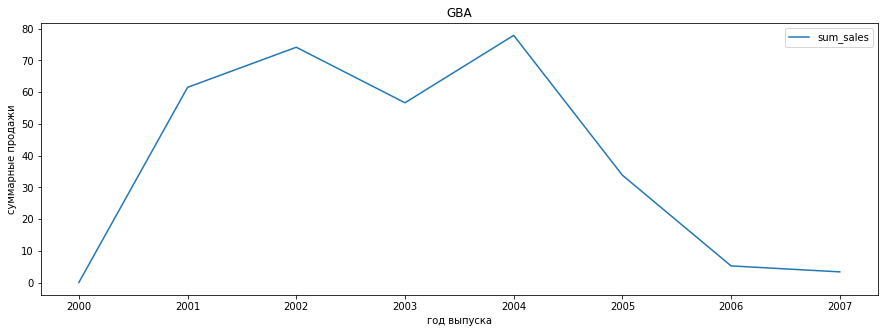

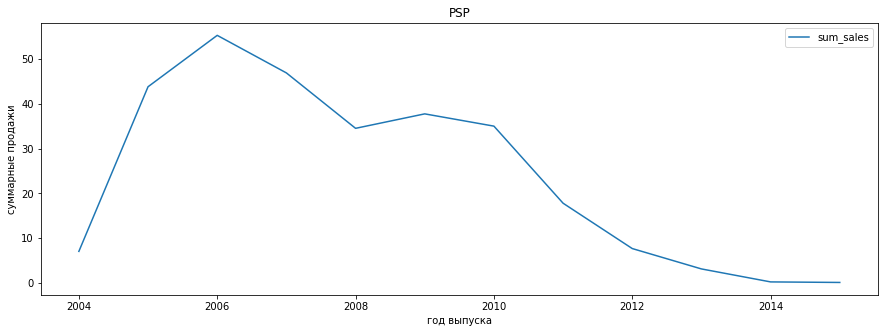

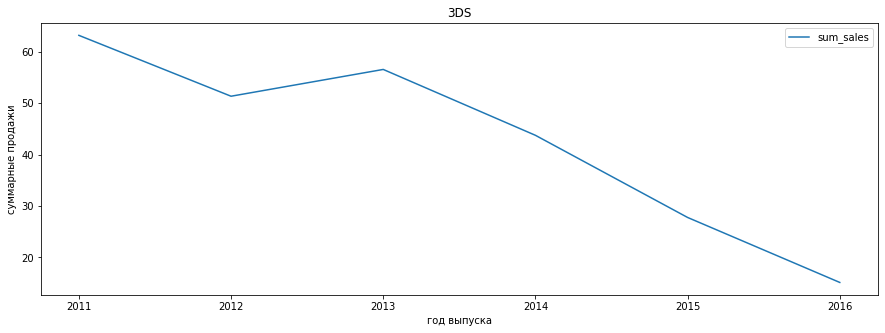

In [41]:
for platform in new_list_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(figsize=(15, 5))
    plt.title(platform)
    plt.xlabel('год выпуска')
    plt.ylabel('суммарные продажи')

**Выделется из всех платформ платформа DS, по которой продажи росли небольшими темпами с 1985г по 2005 до 20млн копий, далее идет резкий рост с 2005 по 2007 года до 140 млн копий но потом наблюдается резкий спад до 20 млн копий к 2010году и далее спад до 0, что может означать, что платформа отжила свой срок**

*Актуальный период выбрали с 2013 по 2016г. так как в бизнес планирование осуществляется именно на такой срок и как правило первые 2 года платформа выходит на рынок а в третий год наблюдается пик ее продаж и как видно по графикам характерный срок жизни платформы 4 года*

*На основе выбранного актуального периода получим следующую таблицу*

In [42]:
data_actual = data.query('year_of_release >= 2013')
top_platforms = data_actual.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(10)


In [43]:
display(top_platforms)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


*Видно, что среди всех платформ выделяется PS4, которая появилаь сравнительно недавно и показывает неплохой рост по сравнению с другими платформами, но с 2015 г по 2016 года платформа показывает небольшое падение, скорее всего временное, так как по качеству и популярнсти она превосходит все другие платформы.*

*Найдем средний срок жизни платформы*

In [44]:
platforms_life = data_actual.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
platforms_life['life'] = platforms_life['max'] - platforms_life['min'] + 1
platforms_life['life'].median()

4.0

*Видно, что характерный срок жизни платформы 4 года*

*Поэкспереминтируем и возьмем полный датасет*

In [45]:
platforms_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
platforms_life['life'] = platforms_life['max'] - platforms_life['min'] + 1
platforms_life['life'].median()

7.0

*А вот здесь уже видим, что характерныый срок, когда исчезают старые платформы и появляются новые- 7 лет. Эта разница обьясняется ускоренным со временем темпом жизни и технологическим скачком во времени*

### Ответ на вопрос 4. Посмотрим на распределение платформ по продажам. Определим самые потенциально прибыльные. ###

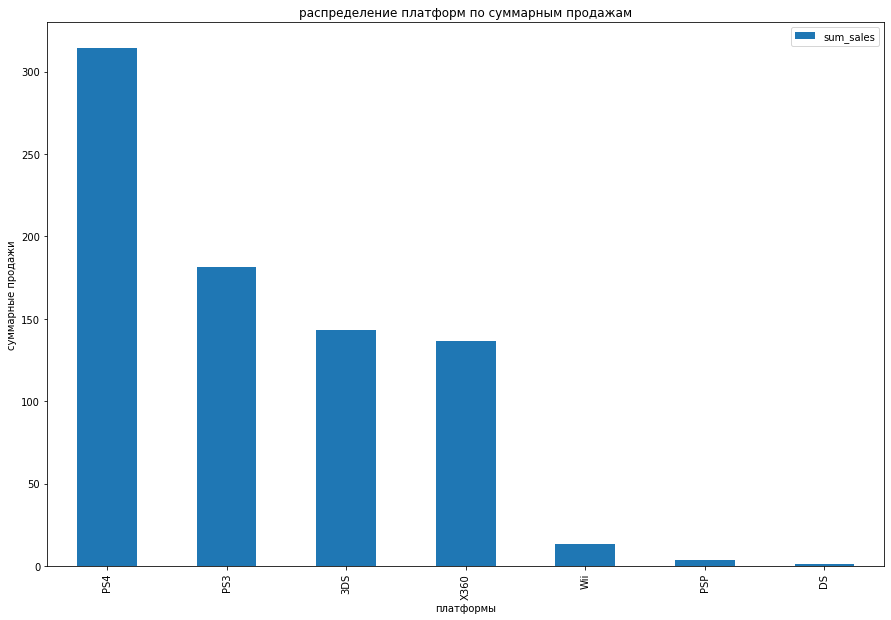

In [46]:
data_actual.query('platform in @new_list_platforms').pivot_table(index='platform', values='sum_sales', aggfunc=('sum'))\
.sort_values(by='sum_sales', ascending=False)\
.plot(kind='bar', figsize=(15, 10), xlabel='платформы', ylabel = 'суммарные продажи', title='распределение платформ по суммарным продажам')
plt.show()

*По продажам лидируют PS4, PS3, 3DS, X360, соответственно отвечая на вопрос о потенциально прибыльных платформах, можно сказать что и дальше в след году будут расти  эти платформы, но если посмотреть предыдущий график и учесть что характерный срок исчезновения старых и появления новых платформ равен 3 года, можно смело утверждать, что все платформы к 2017 году отжили свой срок, кроме одной - это PS4, которая бессомненно является лидером продаж на настоящий момент и появилась не так давно в 2014 году и сответственно несмотря на небольшое снижение к 2016 году(временное снижение), она считается самой популярной, более новой и соответственно самой потенциально прибыльной в 2017 году.*

### Отвечая на следующи вопрос-Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат, построим ящик с усами по глобальным продажам игр в разбивке по платформам. ###

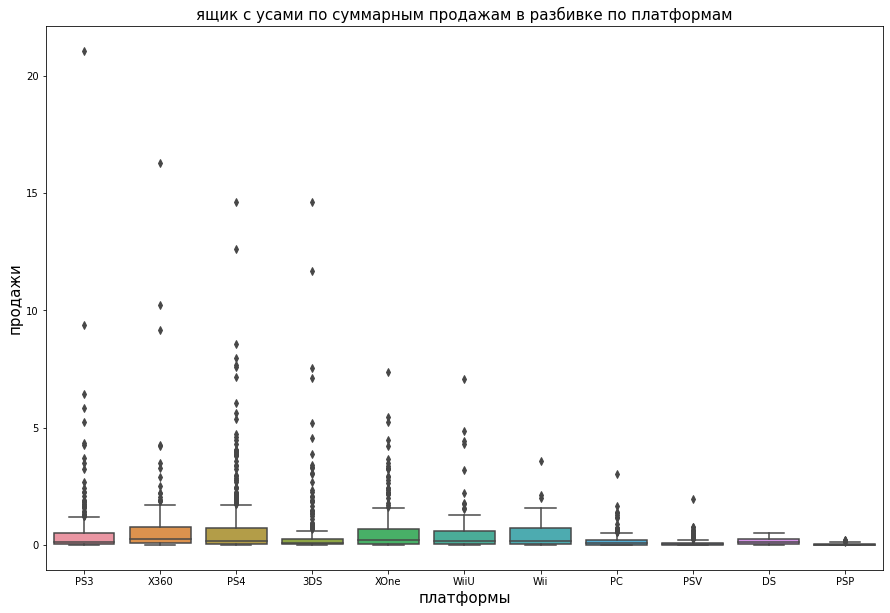

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_actual, x='platform', y='sum_sales')
plt.title('ящик с усами по суммарным продажам в разбивке по платформам', fontsize=15)
plt.xlabel('платформы', fontsize=15)
plt.ylabel('продажи', fontsize=15)
plt.show()

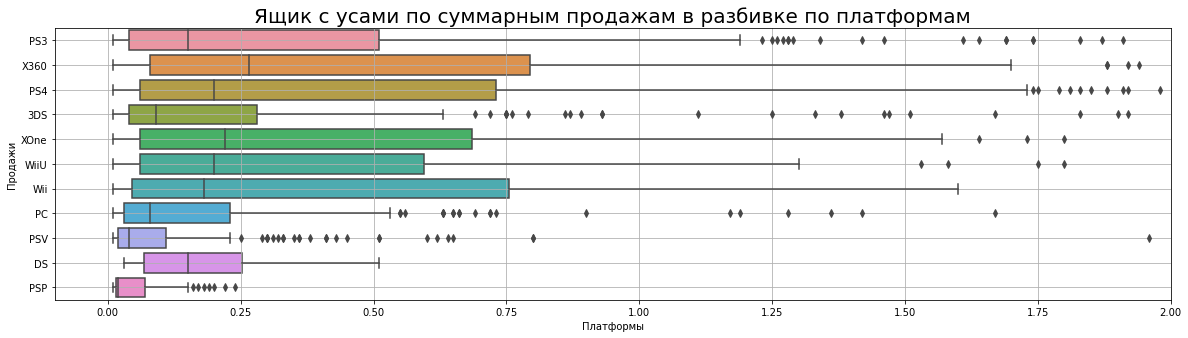

In [48]:
plt.figure(figsize=(20, 5))
plt.xlim(-0.1, 2)
plt.title('Ящик с усами по суммарным продажам в разбивке по платформам', fontsize=20)
sns.boxplot(data=data_actual, x='sum_sales', y='platform', orient='h')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()


*Из графика видно что лидерами продаж являются Wii, PS4 и Xone. Медиана у лидеров находится выше чем у остальных а значит эти платформы пользуются большей популярностью, чем остальные. Причем неожиданно платформа Wii занимает первое место опережая PS4 по продажам и у нее меньше всего выбросов а значит она имеет нормальное распределение что является перспективным факором для ее развития*

### Отвечая на 6 вопрос как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.Построим диаграммы рассеяния для  5 популярных платформ ###

*Возьмем для примера 5 платфформ, которые опредилили ранее и сравним по ним влияние оценок пользователей и критиков  на продажи*

In [49]:
top5_platforms = list(top_platforms.index[0:5])
top5_platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360']

PS4


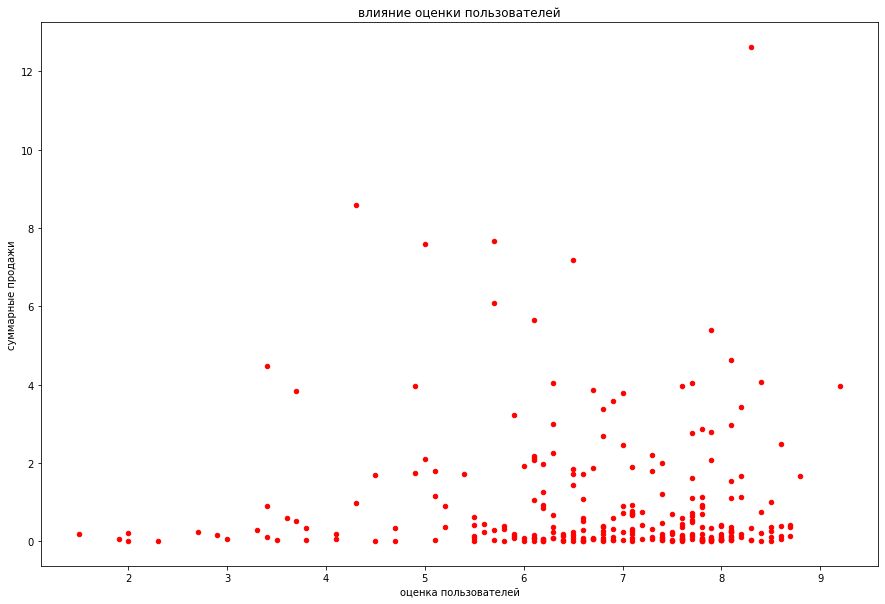

PS3


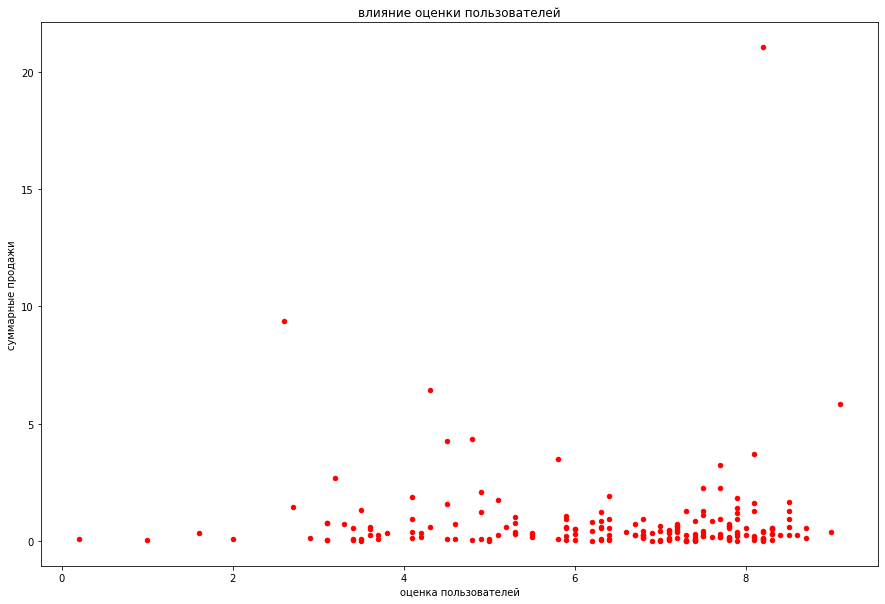

XOne


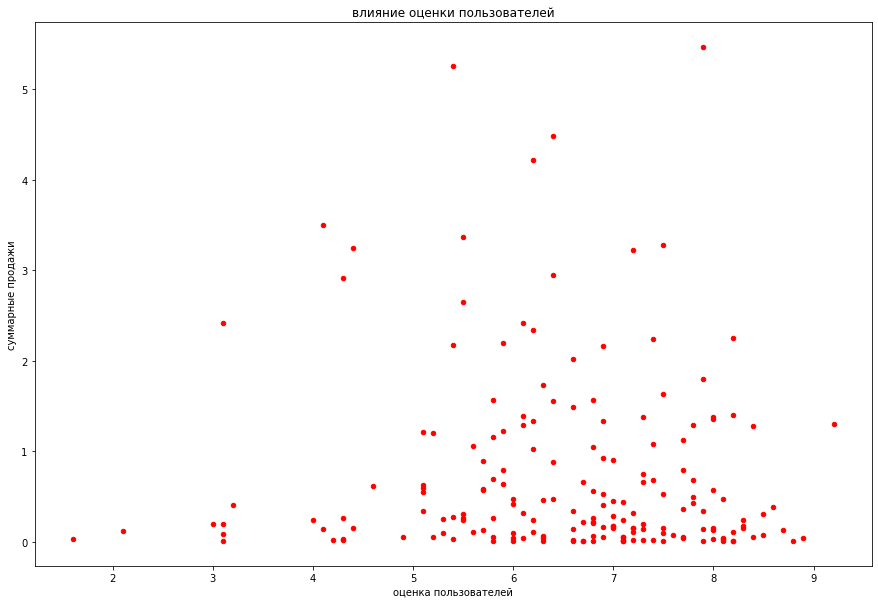

3DS


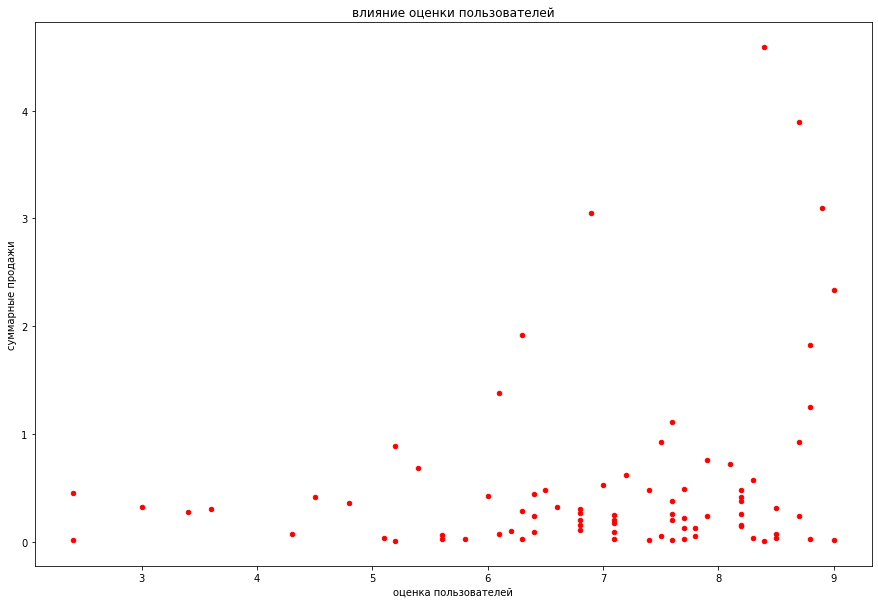

X360


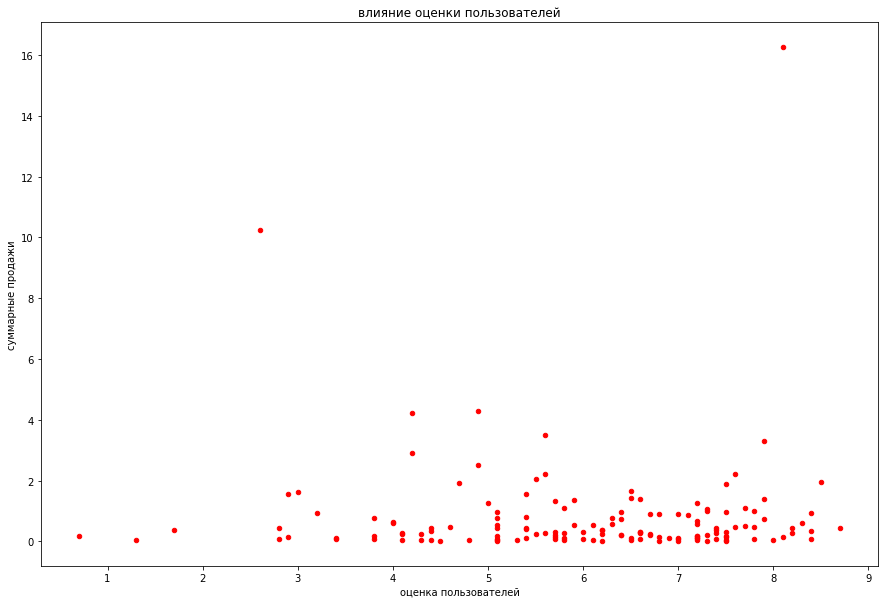

In [50]:

for name in top5_platforms:
    print(name)
    (
    data_actual
        .query('platform == @name and user_score != -1')
        .plot(x='user_score',
         y='sum_sales',
         kind='scatter',
         legend=True,
         color='red',
         alpha=1,
         figsize=(15, 10))
    )   
    plt.title('влияние оценки пользователей')
    plt.xlabel('оценка пользователей')
    plt.ylabel('суммарные продажи')
    plt.show()


*Из графиков видно, что оценки пользователей слабо влияют на продажи игр по платформам, посмотрим теперь связь оценок критиков на  продажи по платформам*

*Далее проверим влияние оценок критиков на суммарные продажи. Построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона*

PS4


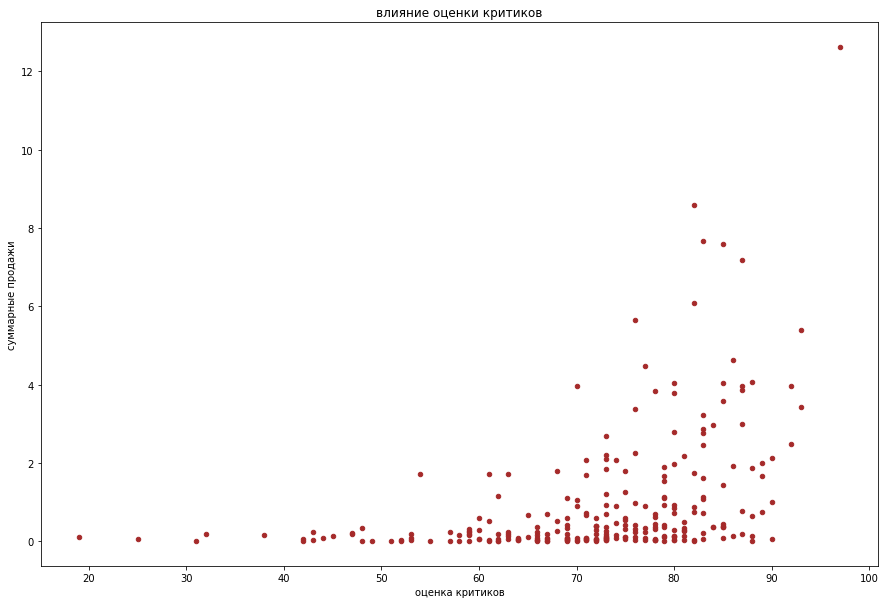

PS3


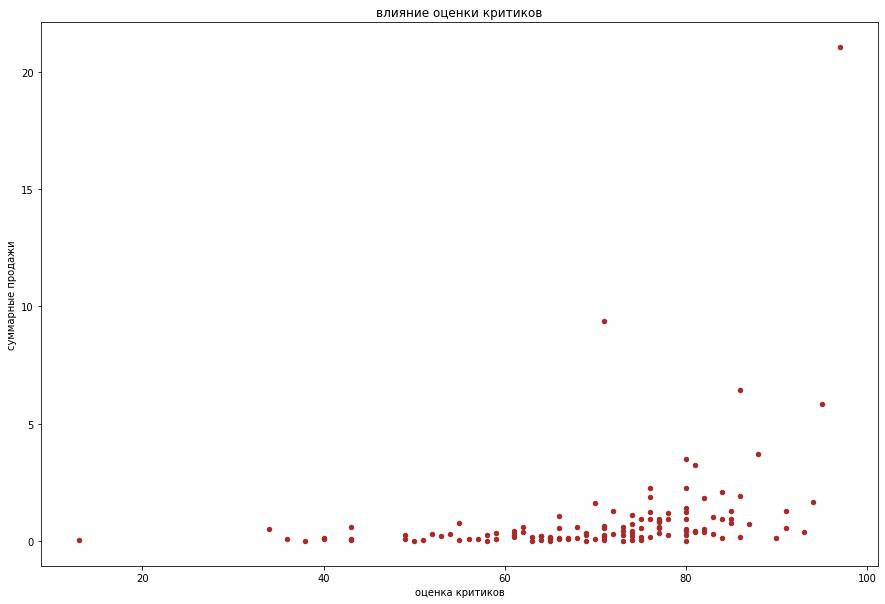

XOne


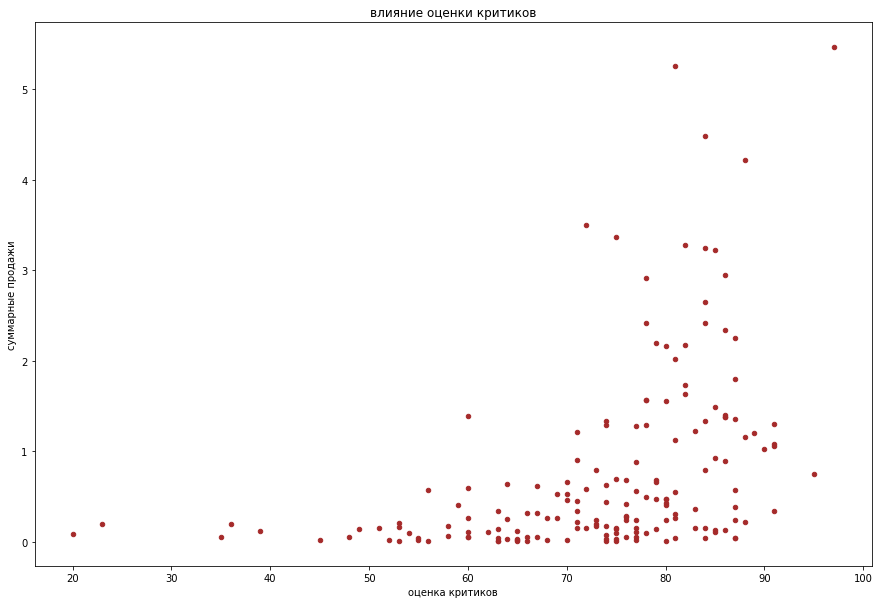

3DS


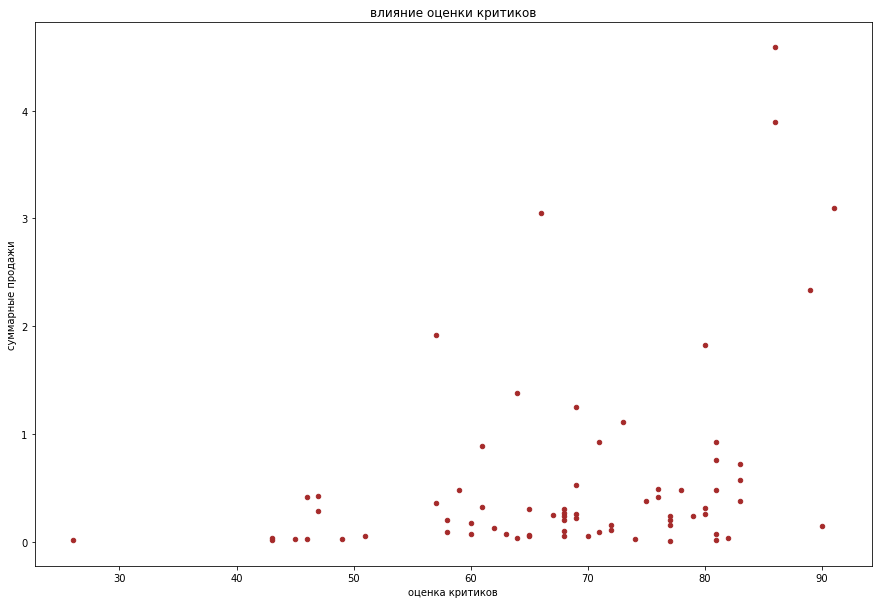

X360


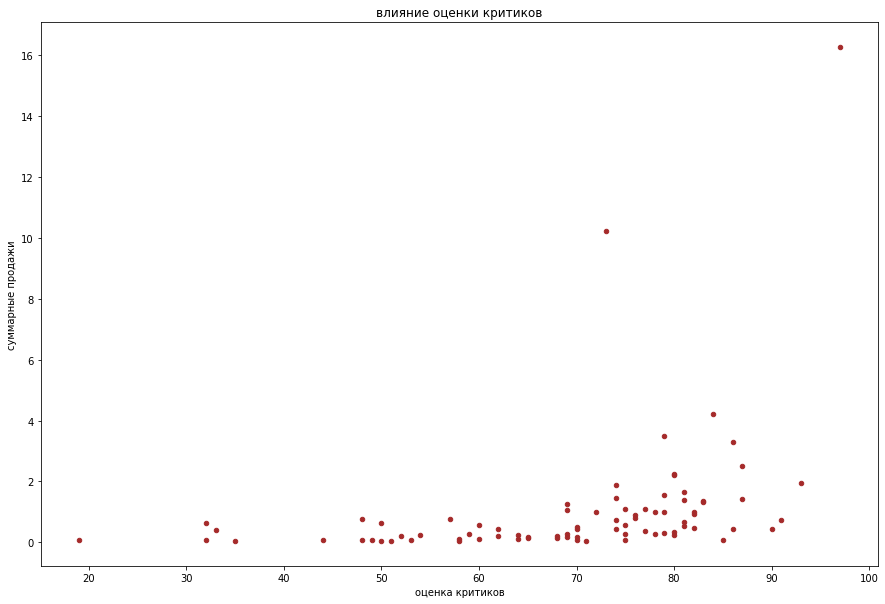

In [51]:
for name in top5_platforms:
   
    print(name)
    (
    data_actual
        .query('platform == @name and critic_score != -1')
        .plot(x='critic_score',
         y='sum_sales',
         kind='scatter',
         legend=True,
         color='brown',
         alpha=1,
         figsize=(15, 10))
    )   
    plt.title('влияние оценки критиков')
    plt.xlabel('оценка критиков')
    plt.ylabel('суммарные продажи')
    plt.show()

    

*Связь оценок критиков с продажами наблюдается только на графиках по платформам PS4 и Xone, в интервале оценок от 50 до 90 баллов отчетливо видна прямая связь оценок критиков на продажи платформы. Если сравнивать влияние оценок пользоватлей и оценок критиков на продажи по платформам, то очевидно что более сильное влияние имеют ценки критиков*

*Посчитаем коэффициент корреляции Пирсона для оценки связи между оценками пользователей/критиков на суммарные продажи*

In [52]:
data_PS4 = data_actual[(data_actual['platform'] == 'PS4') & (data_actual['user_score'] != -1)]
data_PS4_user_score = data_PS4['sum_sales'].corr(data_PS4['user_score'])
print(f'Коэффициент корреляции для оценок пользователей равен - {data_PS4_user_score:.2f}')


Коэффициент корреляции для оценок пользователей равен - -0.03


Найденный коэффициент подтверждает наши выводы. Его значние равно -0.03. Связи нет.

In [53]:
data_PS3 = data_actual[(data_actual['platform'] == 'PS3') & (data_actual['user_score'] != -1)]
data_PS3_user_score = data_PS3['sum_sales'].corr(data_PS3['user_score'])
print(f'Коэффициент корреляции для оценок пользователей равен - {data_PS3_user_score:.2f}')

Коэффициент корреляции для оценок пользователей равен - 0.00


*Связь отсутствует*

In [54]:
data_XOne = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'] != -1)]
data_XOne_user_score = data_XOne['sum_sales'].corr(data_XOne['user_score'])
print(f'Коэффициент корреляции для оценок пользователей равен - {data_XOne_user_score:.2f}')

Коэффициент корреляции для оценок пользователей равен - -0.07


*Связь отсутствует*

In [55]:
data_3DS = data_actual[(data_actual['platform'] == '3DS') & (data_actual['user_score'] != -1)]
data_3DS_user_score = data_3DS['sum_sales'].corr(data_3DS['user_score'])
print(f'Коэффициент корреляции для оценок пользователей равен - {data_3DS_user_score:.2f}')

Коэффициент корреляции для оценок пользователей равен - 0.24


*Связь отсутствует*

In [56]:
data_X360 = data_actual[(data_actual['platform'] == 'X360') & (data_actual['user_score'] != -1)]
data_X360_user_score = data_X360['sum_sales'].corr(data_X360['user_score'])
print(f'Коэффициент корреляции для оценок пользователей равен - {data_X360_user_score:.2f}')

Коэффициент корреляции для оценок пользователей равен - -0.01


*Связь отсутствует*

*Далее проверим влияние оценок критиков на суммарные продажи. Построим диаграмму рассеяния и посчитаем коэффициент корреляции*

In [57]:
data_PS4 = data_actual[(data_actual['platform'] == 'PS4') & (data_actual['critic_score'] != -1)]
data_PS4_critic_score = data_PS4['sum_sales'].corr(data_PS4['critic_score'])
print(f'Коэффициент корреляции для оценок критиков равен - {data_PS4_critic_score:.2f}')

Коэффициент корреляции для оценок критиков равен - 0.41


*Присутствует слабая связь*

In [58]:
data_PS3 = data_actual[(data_actual['platform'] == 'PS3') & (data_actual['critic_score'] != -1)]
data_PS3_critic_score = data_PS3['sum_sales'].corr(data_PS3['critic_score'])
print(f'Коэффициент корреляции для оценок критиков равен - {data_PS3_critic_score:.2f}')

Коэффициент корреляции для оценок критиков равен - 0.33


*Тоже слабая связь*

In [59]:
data_XOne = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['critic_score'] != -1)]
data_XOne_critic_score = data_XOne['sum_sales'].corr(data_XOne['critic_score'])
print(f'Коэффициент корреляции для оценок критиков равен - {data_XOne_critic_score:.2f}')

Коэффициент корреляции для оценок критиков равен - 0.42


*Связь слабая - 40%*

In [60]:
data_3DS = data_actual[(data_actual['platform'] == '3DS') & (data_actual['critic_score'] != -1)]
data_3DS_critic_score = data_3DS['sum_sales'].corr(data_3DS['critic_score'])
print(f'Коэффициент корреляции для оценок критиков равен - {data_3DS_critic_score:.2f}')

Коэффициент корреляции для оценок критиков равен - 0.36


*Аналогичная ситуация связь присутствует, но не сильная*

*Похожая связь как в прошлом примере*

In [61]:
data_X360 = data_actual[(data_actual['platform'] == 'X360') & (data_actual['critic_score'] != -1)]
data_X360_critic_score = data_X360['sum_sales'].corr(data_X360['critic_score'])
print(f'Коэффициент корреляции для оценок критиков равен - {data_X360_critic_score:.2f}')

Коэффициент корреляции для оценок критиков равен - 0.35


*Связь слабая*

*Вывод по разделу влияния оценок пользователей и критиков внутри одной платформы - В целом можно сказать, что и пользователи и критики влияют на продажи игр на разных платформах, но влияние критиков сильнее, чем влияние пользователей. Средний коэффициент влияния критиков равен примерно 0.4 а средний коэффициент пользователей 0.25*

                               Выявление самых потенциально прибыльных жанров
*Ответим на вопрос - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

                                       

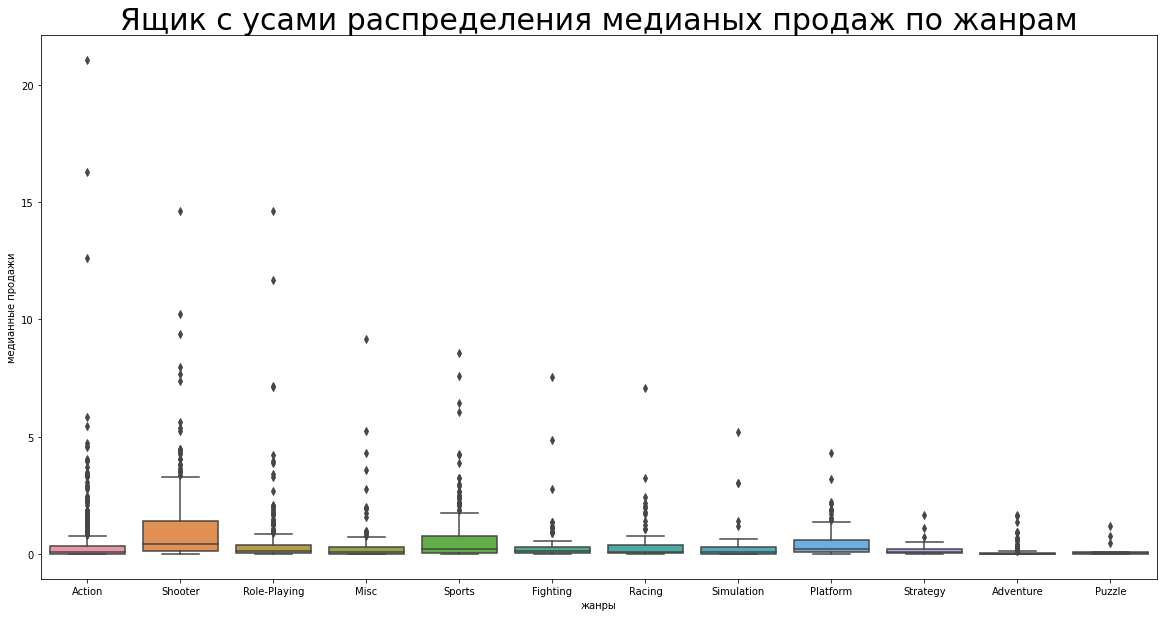

In [62]:
plt.figure(figsize=(20, 10))
plt.xlim(-0.1, 3)
sns.boxplot(x='genre', y='sum_sales', data=data_actual)
plt.title('Ящик с усами распределения медианых продаж по жанрам', fontsize=30)
plt.xlabel('жанры')
plt.ylabel('медианные продажи')
plt.show()

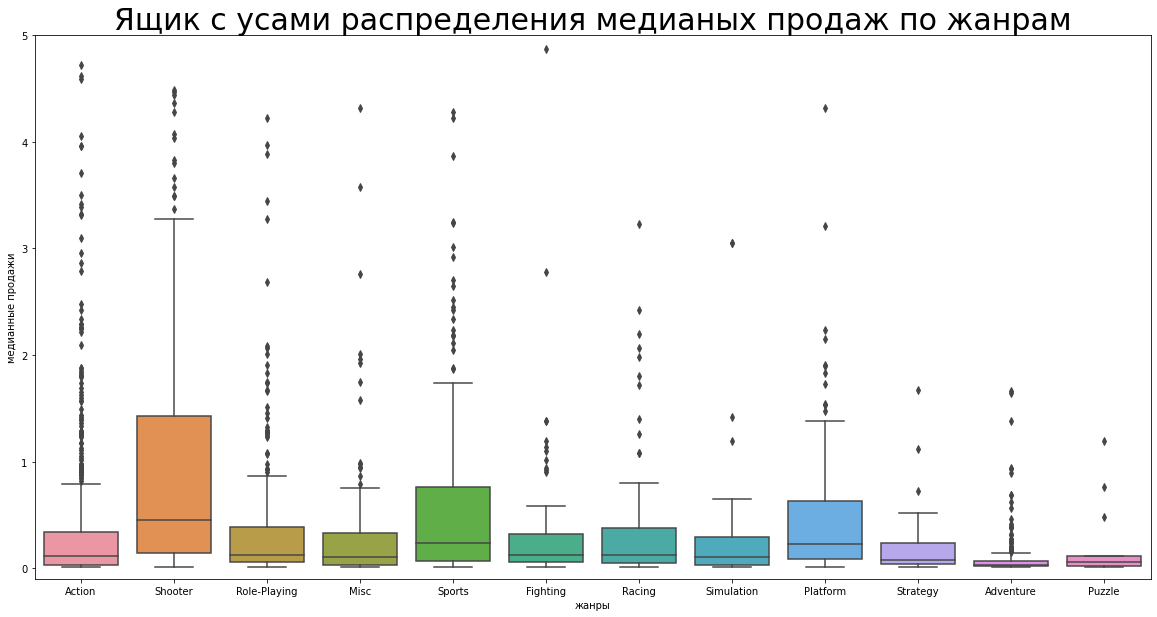

In [63]:
plt.figure(figsize=(20, 10))
plt.ylim(-0.1, 5)
sns.boxplot(x='genre', y='sum_sales', data=data_actual)
plt.title('Ящик с усами распределения медианых продаж по жанрам', fontsize=30)
plt.xlabel('жанры')
plt.ylabel('медианные продажи')
plt.show()

*Выделяется жанр шутер с самыми высокими медианными продажами. с самыми маленькими продажами выделяется жанр 'adventure'. Если смотреть по медианным продажам, то картина немного меняется. Жанр шутер и спортивный остаются в лидерах по прибыли а вот вместо экшена выделяется жанр 'platform' как по размеру боксплота(популярности) так и по медиане. Тоесть можно сделать вывод, что саммыми популярными и самыми прибыльными жанрами являются жанры шутер, спортивный и платформа.*

## Составление портрета пользователя каждого региона ##

Последовательно ответим на следующие вопросы\
1.Определите для пользователя каждого региона (NA, EU, JP):\
2.Самые популярные платформы (топ-5). Опишите различия в долях продаж.\
3.Самые популярные жанры (топ-5). Поясните разницу.\
4.Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

*1. Отвечая на вопрос 1, сначала определим портрет пользователя для северной америки, для этого построим круговую диаграмму*

In [64]:
data_na_grouped = data_actual.pivot_table(index='platform', values='na_sales', aggfunc=('sum')).sort_values(by='na_sales', ascending=False)
data_na_grouped

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


*Найдем топ 5 платформ*

In [65]:
top5_platform_na = list(data_na_grouped.index[0:5])
top5_platform_na





['PS4', 'XOne', 'X360', 'PS3', '3DS']

*Разделим платформы северно америки на топ5 платформ и 'другие' создав новый столбец 'top_platforms'*

In [66]:
def platforms_na(row):
    if row['platform'] in top5_platform_na:
        return 'топ-5 платформ'
    if row['platform'] != top5_platform_na:
        return 'другие'
    else:
        'ошибка'

data_actual['top_platforms']  = data_actual.apply(platforms_na, axis=1)
data_actual

        
        

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,top_platforms
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,топ-5 платформ
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,топ-5 платформ
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,nr,14.63,топ-5 платформ
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,nr,14.60,топ-5 платформ
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,топ-5 платформ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,nr,0.01,другие
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,nr,0.01,другие
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,nr,0.01,топ-5 платформ
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,nr,0.01,другие


In [67]:
data_na_grouped = data_actual.pivot_table(index=['platform', 'top_platforms'], values='na_sales', aggfunc=('sum')).sort_values(by='na_sales', ascending=False)
data_na_grouped


,,na_sales
platform,top_platforms,
PS4,топ-5 платформ,108.74
XOne,топ-5 платформ,93.12
X360,топ-5 платформ,81.66
PS3,топ-5 платформ,63.50
3DS,топ-5 платформ,38.20
WiiU,другие,29.21
PC,другие,11.11
Wii,другие,6.56
PSV,другие,5.04


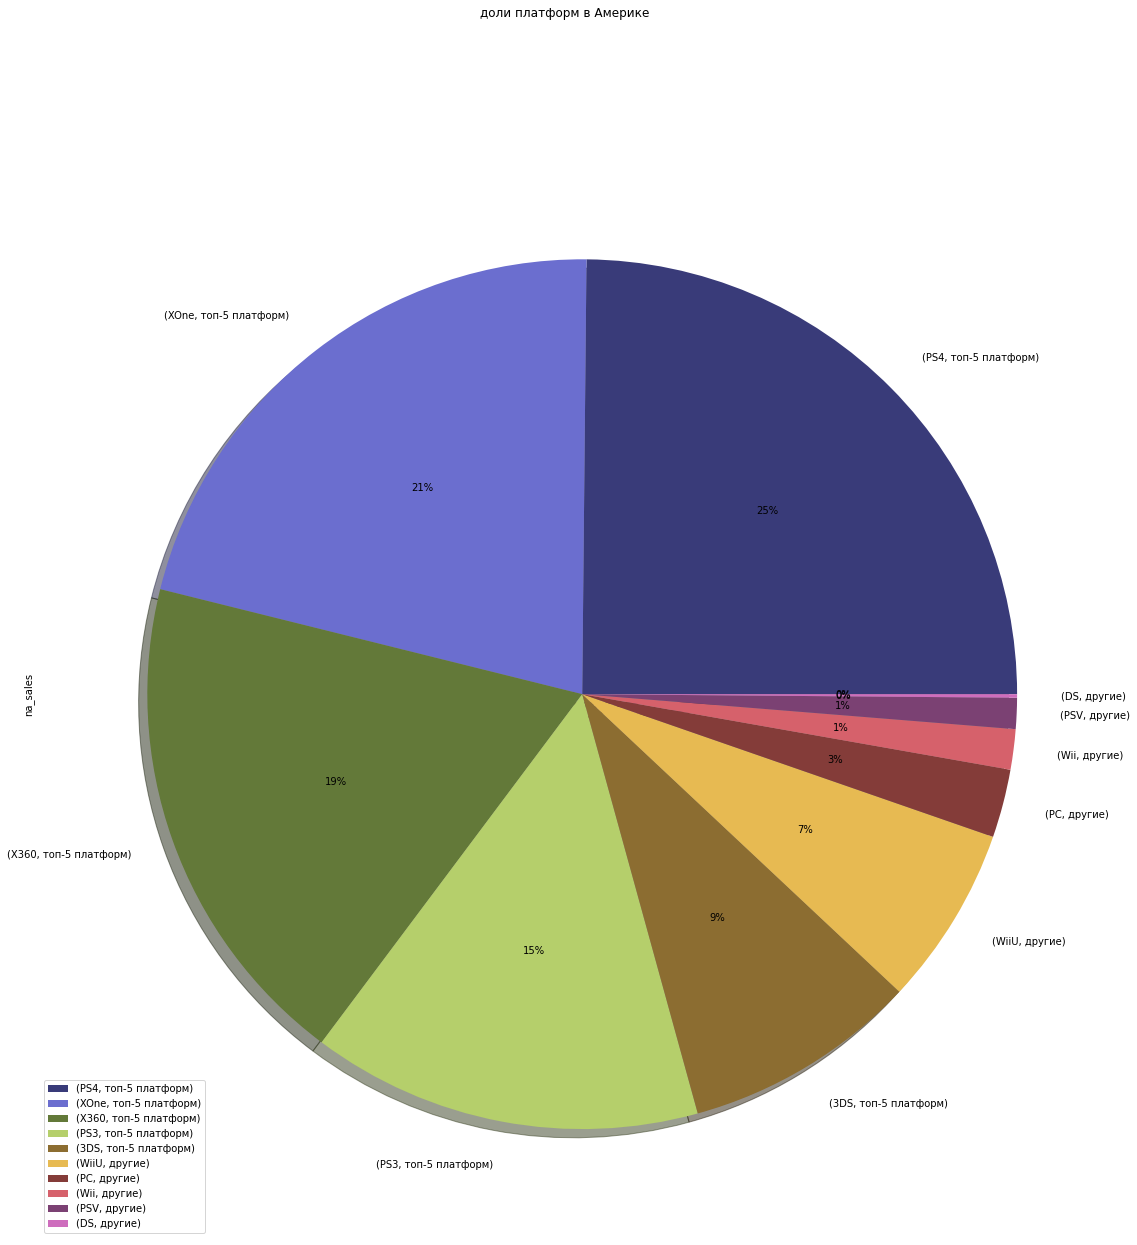

In [68]:
data_na_grouped.plot(kind='pie', subplots=True, cmap='tab20b', legend=True, shadow=True, label='', figsize=(20, 20), autopct='%1.0f%%', title='доли платформ в Америке')
plt.show()

*Строим круговую диаграмму с учетом разделения платформ*

*Из графика видно, что общая доля топ5 платформ в регионе Северна яамерика оставляет 90%, а лидирует с большим отрывом от других, платформа PS4. Доля других платформ, не входящих в топ 5 равна всего 10%*

*Посмотрим на Европу и построим круговую диаграмму распределения долей от рынка региона*

In [69]:
data_eu_grouped = data_actual.pivot_table(index=['platform', 'top_platforms'], values='eu_sales', aggfunc=('sum')).sort_values(by='eu_sales', ascending=False)
data_eu_grouped

,,eu_sales
platform,top_platforms,
PS4,топ-5 платформ,141.09
PS3,топ-5 платформ,67.81
XOne,топ-5 платформ,51.59
X360,топ-5 платформ,42.52
3DS,топ-5 платформ,30.96
PC,другие,25.36
WiiU,другие,19.85
PSV,другие,6.10
Wii,другие,5.93


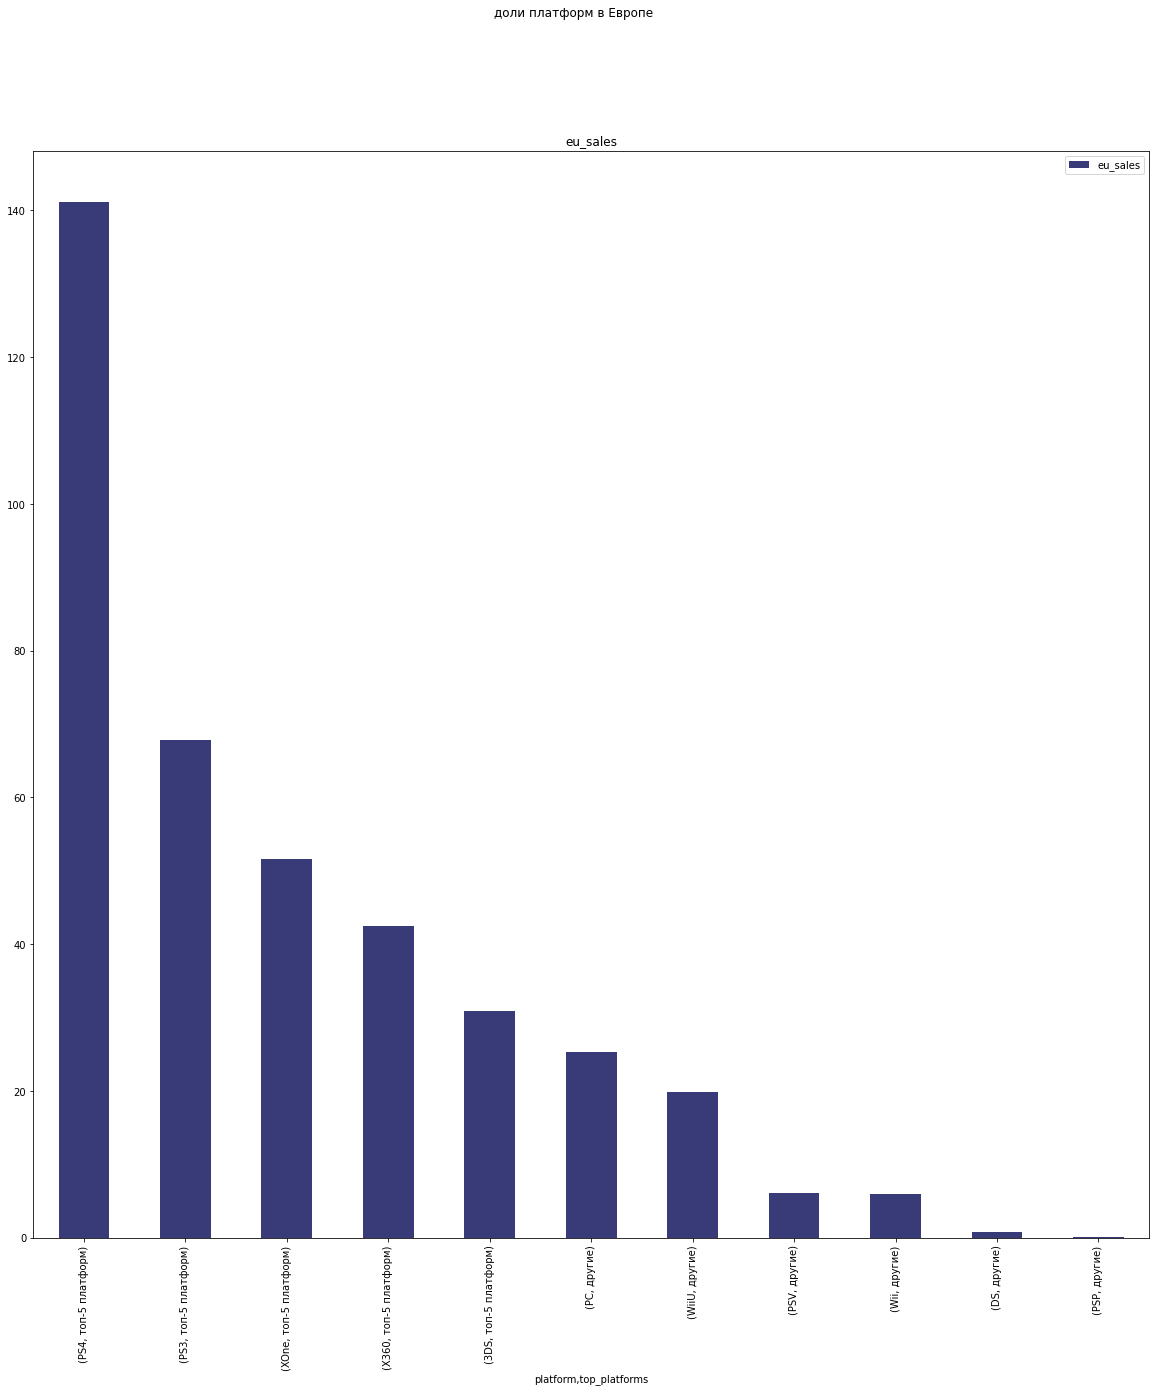

In [70]:
data_eu_grouped.plot(kind='bar', subplots=True, cmap='tab20b', legend=True, label='', figsize=(20, 20), title='доли платформ в Европе')
plt.show()

*Доля топ5 платформ от общего рынка региона составляет около 86%. Доля других также мало как и в америке - 14%. Лидер всего рынка все та же платформа PS4 c большим отрывом от других платформ занимает 48% процентов от всего европйского рынка, далее идут PS3, Xone, X360, 3DS.*

*Посмотрим на Японию*

In [71]:
data_jp_grouped = data_actual.pivot_table(index=['platform', 'top_platforms'], values='jp_sales', aggfunc=('sum')).sort_values(by='jp_sales', ascending=False)
data_jp_grouped

,,jp_sales
platform,top_platforms,
3DS,топ-5 платформ,67.81
PS3,топ-5 платформ,23.35
PSV,другие,18.59
PS4,топ-5 платформ,15.96
WiiU,другие,10.88
PSP,другие,3.29
X360,топ-5 платформ,0.51
XOne,топ-5 платформ,0.34
Wii,другие,0.05


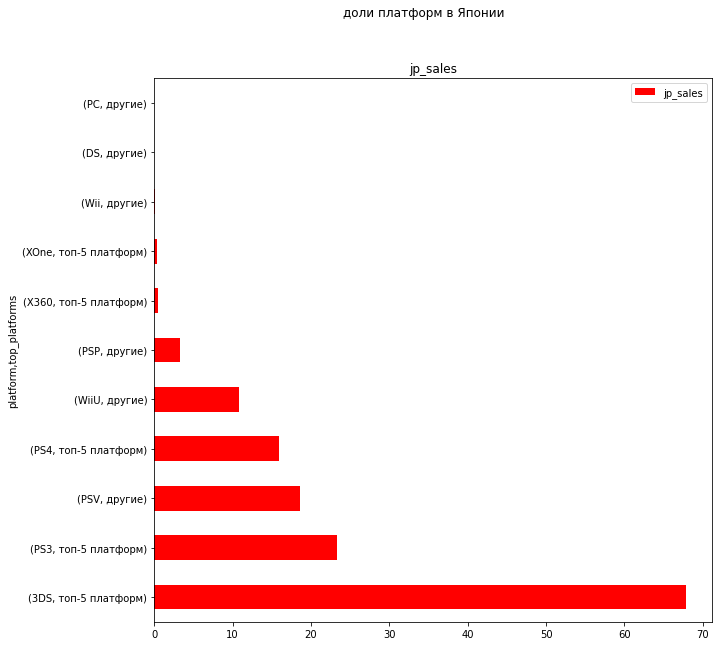

In [72]:
data_jp_grouped.plot(kind='barh', subplots=True, cmap='autumn', legend=True, label='', figsize=(10, 10), title='доли платформ в Японии')
plt.show()

*Здесь большую долю рынка занимает платформа 3DS c 48% процентами.Выделяетс среди других платформ, платформа PSV, которая занимает одинаковую долю с платформой из топ5 - PS4- обе по 16% от рынка. Выделяется  также среди других платформ, платформа Wii c 8% от общего рынка продаж,при этом она обошла платформы из топ5- платформы Xone и x360, доля которых равна примерно 1%*

*Отвечая на следующий вопрос, теперь найдем топ 5 жанров в регионах*

*Топ 5 жанров в америке*

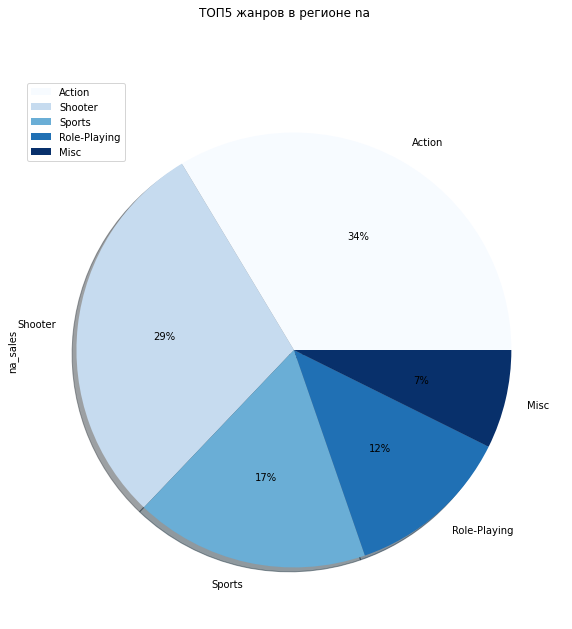

In [73]:
na_sales_genre = data_actual.pivot_table(index='genre', values='na_sales', aggfunc=('sum')).sort_values(by='na_sales', ascending=False)
na_sales_genre
top5_genre_na = list(na_sales_genre.index[0:5])
na_sales_top5_genre = na_sales_genre.query('genre == @top5_genre_na')\
.plot(kind='pie', subplots=True, cmap='Blues', shadow=True, legend=True,
label='', figsize=(10, 10), autopct='%1.0f%%', title = 'ТОП5 жанров в регионе na')
plt.show()


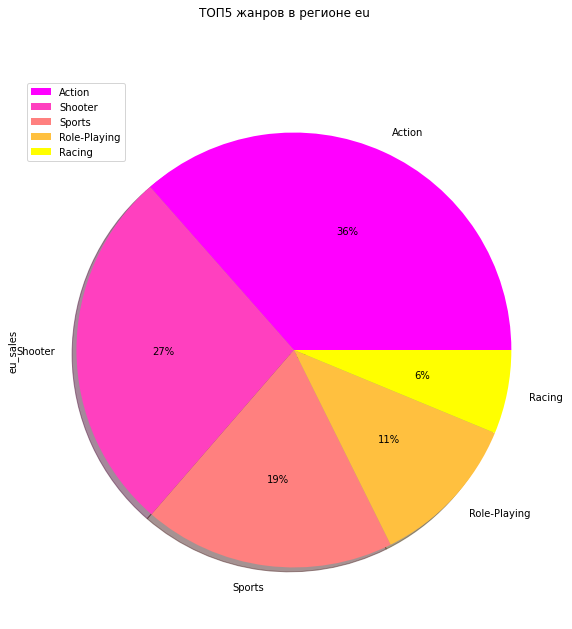

In [74]:
eu_sales_genre = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc=('sum')).sort_values(by='eu_sales', ascending=False)
eu_sales_genre
top5_genre_eu = list(eu_sales_genre.index[0:5])
eu_sales_top5_genre = eu_sales_genre.query('genre == @top5_genre_eu')\
.plot(kind='pie', subplots=True, cmap='spring', shadow=True, legend=True,
label='', figsize=(10, 10), autopct='%1.0f%%', title = 'ТОП5 жанров в регионе eu')
plt.show()

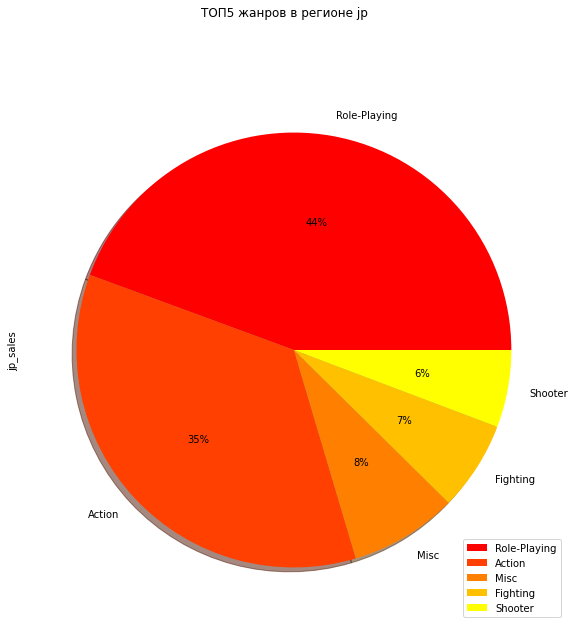

In [75]:
jp_sales_genre = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc=('sum')).sort_values(by='jp_sales', ascending=False)
jp_sales_genre
top5_genre_jp = list(jp_sales_genre.index[0:5])
jp_sales_top5_genre = jp_sales_genre.query('genre == @top5_genre_jp')\
.plot(kind='pie', subplots=True, cmap='autumn', shadow=True, legend=True,
label='', figsize=(10, 10), autopct='%1.0f%%', title = 'ТОП5 жанров в регионе jp')
plt.show()

*Влияние рейтинга ESRB на продажи в отдельном регионе*

*Отвечая на следущий вопрос - Влияет ли рейтинг ESRB на продажи в отдельном регионе?, пострроим круговые диаграммы* 

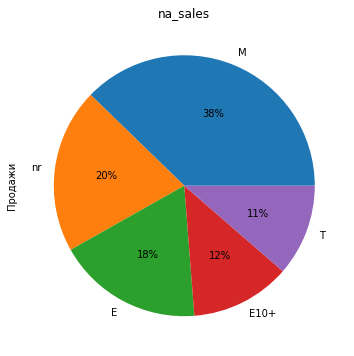

In [76]:
data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending = False).head(5)\
    .plot(kind='pie', legend=False, y='na_sales', autopct='%1.0f%%', figsize=(6 ,6), title = 'na_sales')\
    .set(ylabel='Продажи')
plt.show()

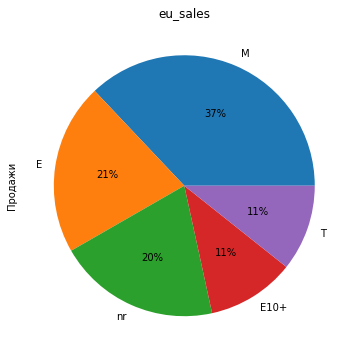

In [77]:
data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending = False).head(5)\
    .plot(kind='pie', legend=False, y='eu_sales', autopct='%1.0f%%', figsize=(6 ,6), title = 'eu_sales')\
    .set(ylabel='Продажи')
plt.show()

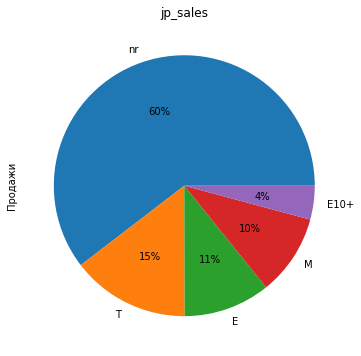

In [78]:
data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending = False).head(5)\
    .plot(kind='pie', legend=False, y='jp_sales', autopct='%1.0f%%', figsize=(6 ,6), title = 'jp_sales')\
    .set(ylabel='Продажи')
plt.show()

*рейтинг ESRB влияет на продажи в разных регионах по разному. В америке и европе схожая ситуация. В лидерах игры для возрослых и игры для всех. В Японии же больше всего игр без рейтинга и игры для подростков 13+*

*Отвечая на вопрос- составьте портрет пользователя в каждом регионе, мы выясняли,что портрет пользователя в северной америке и Европе одинаковые - это взрослый игрок от  17 лет, играющий на PS4 либо XOne, предпочитающий жанры  shooter, action и sports. В В японии это игрок от 13+ лет, играющий только на платформах PS4 и PS3, предпочитает жанры ролевых игр и экшн.*

##  Проверка гипотез ##

Проверим 2 гипотезы. Первая - Средние пользовательские рейтинги платформ XOne и PC одинаковые. Вторая - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Для этого применим тест Стьюдента

Проверим первую гипотезу: H0(нулевая гипотеза):Средний пользовательский рейтинг платформы XOne=Средему  пользовательскому рейтингу платформы PC. Альтернатиная гипотеза Н1 - Средний пользовательский рейтинг платформы XOne не равен среднему пользовательскому рейтингу платформы PC

In [79]:
XOne_rating = data_actual.query('platform == "XOne" and user_score != -1')
XOne_rating['user_score'].describe()


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [80]:
PC_rating = data_actual.query('platform == "PC" and user_score != -1')
PC_rating['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [81]:
XOne_rating['user_score']
PC_rating['user_score']
 
results = st.ttest_ind(XOne_rating['user_score'], PC_rating['user_score'], alternative='two-sided')
print(results.pvalue)
alpha=0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

0.14012658403611647
Не можем отвергнуть нулевую гипотезу


*При данном уровне значимости мы не можем отвергнуть нулевую гипотезу, а значит можем утверждать что нулевая гипотеза о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые, верна.*

*Проверим вторую гипотезу. Н0 =  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Альтернативная гипотеза Н1 =  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не одинаковые*

In [82]:
action_genre = data_actual.query('genre == "Action" and user_score != -1')
action_genre['user_score'].describe()


count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [83]:
sports_genre = data_actual.query('genre == "Sports" and user_score != -1')

In [84]:
sports_genre['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [85]:

results = st.ttest_ind(sports_genre['user_score'], action_genre['user_score'], alternative = 'two-sided')

print(results.pvalue)
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

1.0517832389140023e-27
Отвергаем нулевую гипотезу


*При данном уровне статистической значимости, мы с увереннстью можем утверждать, что не можем отвергнуть Н0 - нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые, а значит отвергаем гипотезу о том, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные*

*При проверке гипотез мы использовали t-тест, так как такой тест применяется при проверке статистических гипотез о среднем и использующий распределение Стьюдента*

## Ответ на 6 вопрос ##

Общий вывод. Мы провели исследовние  продаж компьютерных игр различных игровых платформ по всему миру исходя из исторических данных по играм( игровые платформы, оценки пользователей и критиков, рэйтинги ESRB). В ходе исследования мы:
    
    1. Изучили общую информацию о данных
    2. Провели предобработку данных
       -изменили типы данных,  
       -обработали дубликаты явные и неявные,  
       -обработали пропуски там, где это возможно.  
       -в столбцах с оценками пользователей и оценками критиков заменили пропуски на значения "-1",
       чтобы можно было проводить с данными столбцами следующие вычисления.
    3. Провели исследовательский анализ данных, последовательно отвечая на вопрсы исследования:
    -построили график распределения игр по годам и посмотрели сколько игр выпускалось в разные годы. 
    -определили платформы с наибольшими суммарными продажами и построили график распределения продаж по платформам.
    -нашли характерный срок, за который исчезают сатрые платформы и повляются новые.
    -мы определили актуальный период для построения прогноза прибыльности платформ на 2017 год.
    -на основании выбранного актуального  периода нашли топ платформ по продажам, посмотрели какие платформы растут и какие падают. 
    -на основании актуального периода определили потенциально прибыльные платформы на 2017 год. 
    -построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
    -посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
    -построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. 
    -сформулировали выводы. 
    -соотнесли выводы с продажами игр на других платформах. 
    -посмотрели на общее распределение игр по жанрам.  
    -посмотрели самые прибыльные жанры. Нашли популярные жанры в каждом регионе. 
    4. Составили портрет пользователя каждого региона.
    Для этого мы определили для пользователя каждого региона (NA, EU, JP):
       -самые популярные платформы (топ-5). 
       -описали различия в долях продаж.
       -самые популярные жанры (топ-5). Пояснили разницу.
       -пояснили влияет ли рейтинг ESRB на продажи в отдельном регионе.
    5. И на основании анализа данных мы проверили 2 гипотезы:
        * 5.1. Средние пользовательские рейтинги платформ XOne и PC одинаковые 
        * 5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. И с уверенностью можем утверждать, что первая гипотеза подтвердилась, а вторая была отвергнута.
        
На основании вышеизложенного наш прогноз портрета пользователя в каждом регионе на 2017 год. Портреты пользователей в Америке и Европе похожи - это пользователи, играющие на платформах PS4 и Xone, предпочитающие жанры Экшн, шутер и спортивный c рейтингом ESRB - М(тоесть с возрастным ограничением 17+). В Японии же немного другие вкусы - там у пользователей популярные платформы 3DS и PS4, c жанрами РПГ и Экшн и без рейтинга ESRB. Как в Америке, Европе так и в Японии внимание на отзывы пользователей и критиков обращать не стоит, так как присутствует слабая связь между отзывами и продажами игр.

<img src="https://s19536.pcdn.co/wp-content/uploads/2020/06/Web-Great-Job.jpg"> 
<div class="alert alert-success">   



</div>    